In [44]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains
import time
import pandas as pd


url = "https://new.land.naver.com/complexes/112054?ms=37.394112,126.933588,17&a=APT:ABYG:JGC:PRE&e=RETAIL"

driver = webdriver.Chrome(service = Service("../../../driver/chromedriver-linux64/chromedriver"))

driver.get(url)

time.sleep(3)
sail_button = driver.find_element(By.XPATH, '''//*[@id="summaryInfo"]/div[2]/div[2]/button[2]''')
sail_button.click()
time.sleep(1)

detail_panel = driver.find_element(By.CLASS_NAME, "detail_panel")

action = ActionChains(driver)
action.click(detail_panel)
action.send_keys(Keys.PAGE_DOWN).perform()
time.sleep(2)

## 보이지 않아도 버튼이 존재하면 자기가 알아서 스크롤을 내림

while True:
    try:
        more_price_btn = driver.find_element(By.CSS_SELECTOR, '''#tabpanel1 > div:nth-child(7) > button''')
        more_price_btn.click()
        time.sleep(1)
        
    except:
        page = driver.page_source
        soup = BeautifulSoup(page, "html.parser")
        
        action.click(detail_panel)
        for _ in range(4):
            action.send_keys(Keys.PAGE_UP).perform()
        time.sleep(2)
        jeonse_btn = driver.find_element(By.CSS_SELECTOR, '''#marketPriceTab2''')
        jeonse_btn.click()
        time.sleep(2)

        action.click(detail_panel)
        action.send_keys(Keys.PAGE_DOWN).perform()
        time.sleep(2)
        while True:
            try:
                more_jeonse_btn = driver.find_element(By.CSS_SELECTOR, '''#tabpanel1 > div:nth-child(7) > button''')
                more_jeonse_btn.click()
                time.sleep(3)
            except:
                page2 = driver.page_source
                soup2 = BeautifulSoup(page2, "html.parser")
                break
        break    

price = soup.find_all("table", class_="detail_data_table type_price")[0]
jeonse = soup2.find_all("table", class_="detail_data_table type_price")[0]
price_li = price.find_all("td")
price_date = price.find_all("th", scope = "row")
jeonse_li = jeonse.find_all("td")
jeonse_date = jeonse.find_all("th", scope = "row")

price_data=[]
for price in price_li:
    try:
        price = price.text.replace("억", "")
        if price == "4":
            price += "0000"
        else:
            price = price.split(",")[0] + price.split(",")[1]
        price_data.append(int(price))
    except:
        continue

jeonse_data=[]
for jeonse in jeonse_li:
    try:
        jeonse = jeonse.text.replace("억", "")
        if jeonse == "3":
            jeonse += "0000"
        else:
            jeonse = jeonse.split(",")[0] + jeonse.split(",")[1]
        jeonse_data.append(int(jeonse))
        
    except:
        continue

pr_df = []
for idx in range(0, len(price_data)//3):
    pr_dic = {"날짜" : price_date[idx],
                "하위평균가" : price_data[3*idx], 
              "일반평균가" : price_data[3*idx+1],
              "상위평균가" : price_data[3*idx+2]}
    pr_df.append(pr_dic)

je_df = []
for idx in range(0, len(jeonse_data)//3):
    je_dic = {"날짜" : jeonse_date[idx],
                "전세하위평균가" : jeonse_data[3*idx], 
              "전세일반평균가" : jeonse_data[3*idx+1],
              "전세상위평균가" : jeonse_data[3*idx+2]}
    je_df.append(je_dic)

je_df = pd.DataFrame(je_df)
pr_df = pd.DataFrame(pr_df)
 
driver.close()

In [52]:
pr_df

,날짜,하위평균가,일반평균가,상위평균가
0,[2023.08.18.],34250,36500,38000
1,[2023.08.11.],34250,36500,38000
2,[2023.08.04.],34250,36500,38000
3,[2023.07.28.],34250,36500,38000
4,[2023.07.21.],34250,36500,38000
5,[2023.07.14.],34750,36500,37500
6,[2023.07.07.],34750,36500,37500
7,[2023.06.30.],34750,36500,37500
8,[2023.06.23.],34750,36500,37500
9,[2023.06.16.],34750,36500,37500


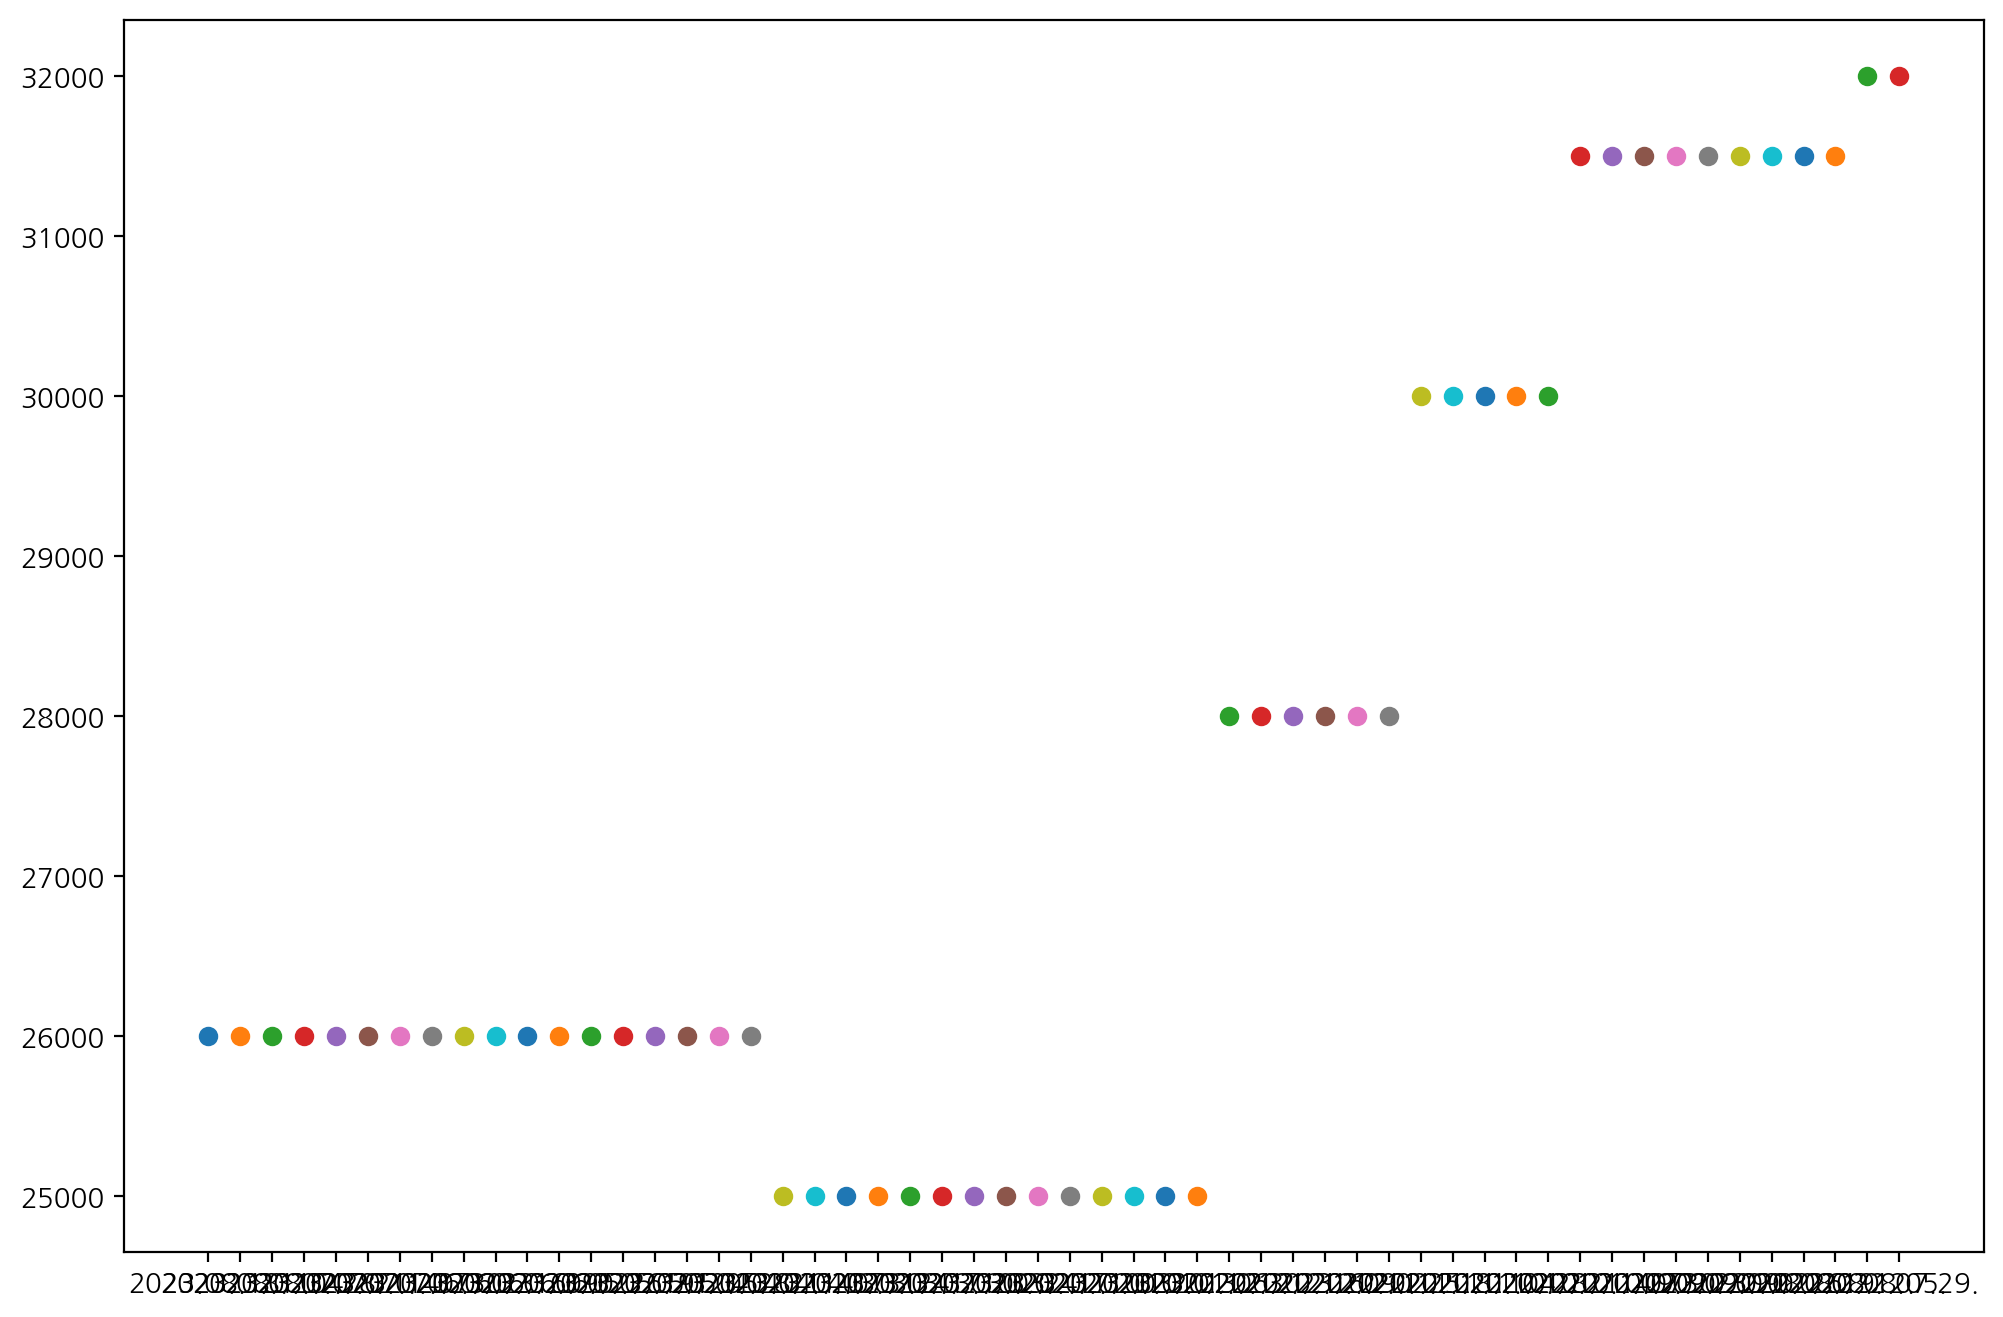

In [63]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(12,8))
for idx in range(len(je_df["전세상위평균가"])):
    plt.scatter(je_df["날짜"][idx].text, je_df["전세일반평균가"][idx])
plt.show();

In [182]:
pr_df[pr_df["하위평균가"] == "4"] = "40,000"

In [183]:
pr_df[pr_df["일반평균가"] == "4"] = "40,000"

,하위평균가,일반평균가,상위평균가
0,"34,250","36,500","38,000"
1,"34,250","36,500","38,000"
2,"34,250","36,500","38,000"
3,"34,250","36,500","38,000"
4,"34,250","36,500","38,000"
5,"34,750","36,500","37,500"
6,"34,750","36,500","37,500"
7,"34,750","36,500","37,500"
8,"34,750","36,500","37,500"
9,"34,750","36,500","37,500"


In [137]:

price_data=[]
for price in price_li:
    try:
        price_data.append(price.text.replace("억", ""))
    except:
        continue
price_data        

['34,250',
 '36,500',
 '38,000',
 '71~72%',
 '34,250',
 '36,500',
 '38,000',
 '71~72%',
 '34,250',
 '36,500',
 '38,000',
 '71~72%',
 '34,250',
 '36,500',
 '38,000',
 '71~72%',
 '34,250',
 '36,500',
 '38,000',
 '71~72%',
 '34,750',
 '36,500',
 '37,500',
 '71~72%',
 '34,750',
 '36,500',
 '37,500',
 '71~72%',
 '34,750',
 '36,500',
 '37,500',
 '71~72%',
 '34,750',
 '36,500',
 '37,500',
 '71~72%',
 '34,750',
 '36,500',
 '37,500',
 '71~72%',
 '34,750',
 '36,500',
 '37,500',
 '71~72%',
 '34,750',
 '36,500',
 '37,500',
 '71~72%',
 '34,750',
 '37,000',
 '38,000',
 '71%',
 '34,750',
 '37,000',
 '38,000',
 '71%',
 '34,750',
 '37,000',
 '38,000',
 '71%',
 '34,750',
 '37,000',
 '38,000',
 '71%',
 '34,750',
 '37,000',
 '38,000',
 '71%',
 '35,000',
 '37,000',
 '38,000',
 '71%',
 '35,000',
 '37,000',
 '38,000',
 '68%',
 '35,000',
 '37,000',
 '38,000',
 '68%',
 '35,000',
 '37,000',
 '38,000',
 '68%',
 '35,000',
 '37,000',
 '38,000',
 '68%',
 '35,000',
 '37,000',
 '38,000',
 '68%',
 '35,000',
 '37,000',

In [138]:
pr_data = []
for price in price_data:
    if not "%" in price:
        pr_data.append(price)
pr_data


['34,250',
 '36,500',
 '38,000',
 '34,250',
 '36,500',
 '38,000',
 '34,250',
 '36,500',
 '38,000',
 '34,250',
 '36,500',
 '38,000',
 '34,250',
 '36,500',
 '38,000',
 '34,750',
 '36,500',
 '37,500',
 '34,750',
 '36,500',
 '37,500',
 '34,750',
 '36,500',
 '37,500',
 '34,750',
 '36,500',
 '37,500',
 '34,750',
 '36,500',
 '37,500',
 '34,750',
 '36,500',
 '37,500',
 '34,750',
 '36,500',
 '37,500',
 '34,750',
 '37,000',
 '38,000',
 '34,750',
 '37,000',
 '38,000',
 '34,750',
 '37,000',
 '38,000',
 '34,750',
 '37,000',
 '38,000',
 '34,750',
 '37,000',
 '38,000',
 '35,000',
 '37,000',
 '38,000',
 '35,000',
 '37,000',
 '38,000',
 '35,000',
 '37,000',
 '38,000',
 '35,000',
 '37,000',
 '38,000',
 '35,000',
 '37,000',
 '38,000',
 '35,000',
 '37,000',
 '38,000',
 '35,000',
 '37,000',
 '38,000',
 '35,000',
 '37,000',
 '38,000',
 '35,000',
 '37,000',
 '38,000',
 '35,000',
 '37,000',
 '38,000',
 '35,000',
 '37,000',
 '38,000',
 '35,000',
 '37,000',
 '38,000',
 '35,000',
 '37,000',
 '38,000',
 '35,000',

In [143]:
pr_df = []
for idx in range(0, len(pr_data)//3):
    pr_dic = {"하위평균가" : pr_data[3*idx], 
              "일반평균가" : pr_data[3*idx+1],
              "상위평균가" : pr_data[3*idx+2]}
    pr_df.append(pr_dic)

pr_df


[{'하위평균가': '34,250', '일반평균가': '36,500', '상위평균가': '38,000'},
 {'하위평균가': '34,250', '일반평균가': '36,500', '상위평균가': '38,000'},
 {'하위평균가': '34,250', '일반평균가': '36,500', '상위평균가': '38,000'},
 {'하위평균가': '34,250', '일반평균가': '36,500', '상위평균가': '38,000'},
 {'하위평균가': '34,250', '일반평균가': '36,500', '상위평균가': '38,000'},
 {'하위평균가': '34,750', '일반평균가': '36,500', '상위평균가': '37,500'},
 {'하위평균가': '34,750', '일반평균가': '36,500', '상위평균가': '37,500'},
 {'하위평균가': '34,750', '일반평균가': '36,500', '상위평균가': '37,500'},
 {'하위평균가': '34,750', '일반평균가': '36,500', '상위평균가': '37,500'},
 {'하위평균가': '34,750', '일반평균가': '36,500', '상위평균가': '37,500'},
 {'하위평균가': '34,750', '일반평균가': '36,500', '상위평균가': '37,500'},
 {'하위평균가': '34,750', '일반평균가': '36,500', '상위평균가': '37,500'},
 {'하위평균가': '34,750', '일반평균가': '37,000', '상위평균가': '38,000'},
 {'하위평균가': '34,750', '일반평균가': '37,000', '상위평균가': '38,000'},
 {'하위평균가': '34,750', '일반평균가': '37,000', '상위평균가': '38,000'},
 {'하위평균가': '34,750', '일반평균가': '37,000', '상위평균가': '38,000'},
 {'하위평균가': '34,750', '일반평균가': '37,000', 

In [142]:
len(pr_data)//3

54